In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy
import glob
import datetime


## Get files

In [7]:
iopSel = 'TOGA'
# iopSel = 'BOMEX'


if iopSel=='TOGA': 
    dir_32L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestTOGA_GustMods.32L_print001/'
    dir_58L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestTOGA_GustMods.58L_print001/'
    dir_58Lcamdev = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestTOGA_GustMods.58L_camdev_print001/'

    atmFile_32       = np.sort(glob.glob(dir_32L+'atm/hist/*h0*'))
    atmFile_58       = np.sort(glob.glob(dir_58L+'atm/hist/*h0*'))
    atmFile_58camdev = np.sort(glob.glob(dir_58Lcamdev+'atm/hist/*h0*'))


    atmh0_32       = xr.open_dataset(atmFile_32[0], decode_times=True)
    atmh0_58       = xr.open_dataset(atmFile_58[0], decode_times=True)
    atmh0_58camdev = xr.open_dataset(atmFile_58camdev[0], decode_times=True)
    
    ## Get IOP stuff
    iopFile ='/glade/p/cesmdata/cseg/inputdata/atm/cam/scam/iop/TOGAII_4scam.nc'
    iopDS   = xr.open_dataset(iopFile)

    iopDS_windMag = np.sqrt( (iopDS.usrf.values**2) + (iopDS.vsrf.values**2) )
    
    # IOP time is funky 
    iop_startTime = datetime.datetime(1992,12,18)
    iopTime = []
    for iTime in range(len(iopDS.tsec.values)):
        iopTimeTemp = iop_startTime + datetime.timedelta(seconds=int(iopDS.tsec.values[iTime]))
        iopTime     = np.append(iopTime, iopTimeTemp)

    iopDS['Time'] = (('time'), iopTime)
    
elif iopSel=='BOMEX': 
    dir_32L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.32L_cam6_print001/'
    dir_58L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_cam6_print001/'
    dir_58Lcamdev = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_camdev_print001/'
    dir_58Lcamdev2 = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_camdev_print002/'

    atmFile_32       = np.sort(glob.glob(dir_32L+'atm/hist/*h0*'))
    atmFile_58       = np.sort(glob.glob(dir_58L+'atm/hist/*h0*'))
    atmFile_58camdev = np.sort(glob.glob(dir_58Lcamdev+'atm/hist/*h0*'))
    atmFile_58camdev2 = np.sort(glob.glob(dir_58Lcamdev2+'atm/hist/*h0*'))

    atmh0_32       = xr.open_dataset(atmFile_32[0], decode_times=True)
    atmh0_58       = xr.open_dataset(atmFile_58[0], decode_times=True)
    atmh0_58camdev = xr.open_dataset(atmFile_58camdev[0], decode_times=True)
    atmh0_58camdev2 = xr.open_dataset(atmFile_58camdev2[0], decode_times=True)
    
    ## Get IOP stuff
    iopFile ='/glade/p/cesmdata/cseg/inputdata/atm/cam/scam/iop/BOMEX_5day_4scam.nc'
    iopDS   = xr.open_dataset(iopFile)

    # iopDS_windMag = np.sqrt( (iopDS.usrf.values**2) + (iopDS.vsrf.values**2) )
    
    # IOP time is funky 
    iop_startTime = datetime.datetime(1969,6,25)
    iopTime = []
    for iTime in range(len(iopDS.tsec.values)):
        iopTimeTemp = iop_startTime + datetime.timedelta(seconds=int(iopDS.tsec.values[iTime]))
        iopTime     = np.append(iopTime, iopTimeTemp)

    iopDS['Time'] = (('time'), iopTime)


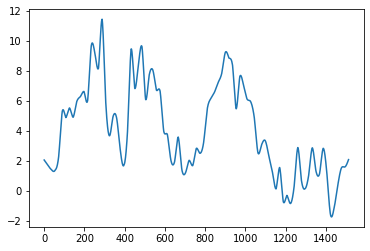

In [9]:
plt.plot(np.squeeze(iopDS.usrf.values))

In [5]:
## Add wind speed: 
atmh0_32_windSpd       = np.sqrt( (atmh0_32['U'].values**2) + (atmh0_32['V'].values**2) )
atmh0_58_windSpd       = np.sqrt( (atmh0_58['U'].values**2) + (atmh0_58['V'].values**2) )
atmh0_58camdev_windSpd = np.sqrt( (atmh0_58camdev['U'].values**2) + (atmh0_58camdev['V'].values**2) )
atmh0_58camdev2_windSpd = np.sqrt( (atmh0_58camdev2['U'].values**2) + (atmh0_58camdev2['V'].values**2) )

atmh0_32['windSpeed']       = ( ('time','lev','lat','lon'), atmh0_32_windSpd)
atmh0_58['windSpeed']       = ( ('time','lev','lat','lon'), atmh0_58_windSpd)
atmh0_58camdev['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58camdev_windSpd)
atmh0_58camdev2['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58camdev2_windSpd)


In [8]:
atmh0_58.time.values[0:2]


array([cftime.DatetimeNoLeap(1969, 6, 25, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 6, 25, 0, 20, 0, 0, has_year_zero=True)],
      dtype=object)

In [9]:
pd.to_datetime(iopDS['Time'])

DatetimeIndex(['1969-06-25', '1969-06-30'], dtype='datetime64[ns]', freq=None)

In [51]:
atmh0_32.time.values

array([cftime.DatetimeNoLeap(1992, 12, 18, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1992, 12, 18, 18, 20, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1992, 12, 18, 18, 40, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(1993, 1, 8, 17, 20, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1993, 1, 8, 17, 40, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1993, 1, 8, 18, 0, 0, 0, has_year_zero=True)],
      dtype=object)

## Some analysis

In [38]:
## Just to confirm - duu10n *is* in fact equal to the U10 values saved out to the history files at the same timesetp. 
##   That is, in the log file for writing out time sample 1510, duu10n = 3.51988700776778

# print(atmh0_32.U10.values[1510]**2)
# print(atmh0_58camdev.U10.values[11]**2)



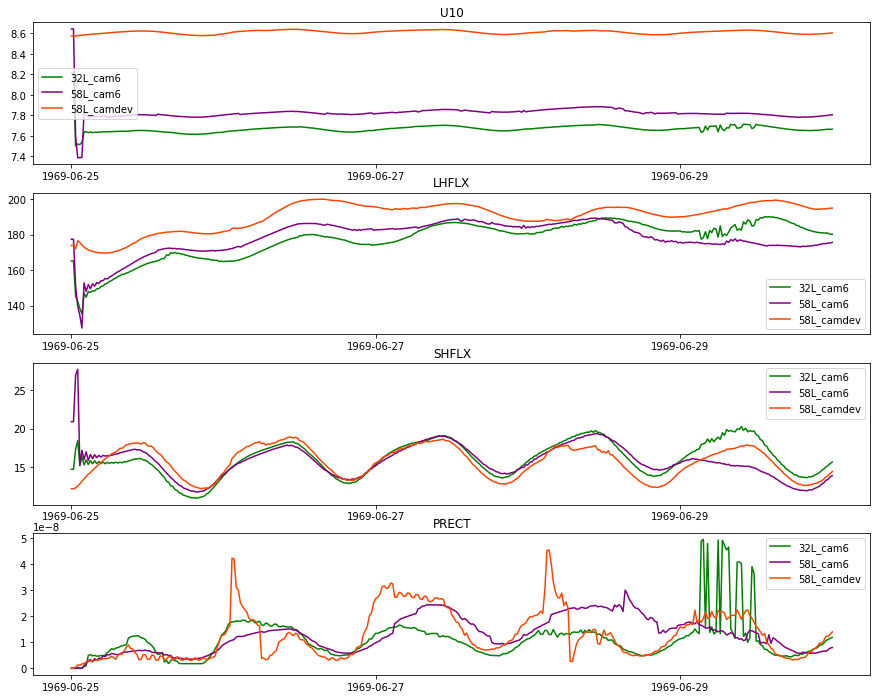

In [8]:
plotVars = ['U10','LHFLX','SHFLX','PRECT']

fig,axs = plt.subplots(len(plotVars),1, figsize=(15,3*len(plotVars)))
axs     = axs.ravel()

for iVar in range(len(plotVars)):
    axs[iVar].plot(atmh0_32.time.values, np.squeeze(atmh0_32[plotVars[iVar]].values), 
            color='green', label='32L_cam6' )
    axs[iVar].plot(atmh0_58.time.values, np.squeeze(atmh0_58[plotVars[iVar]].values), 
            color='purple', label='58L_cam6' )
    axs[iVar].plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev[plotVars[iVar]].values), 
            color='orangered', label='58L_camdev' )
    # axs[iVar].plot(atmh0_58camdev2.time.values, np.squeeze(atmh0_58camdev2[plotVars[iVar]].values), '--',
    #         color='blue', label='58L_camdev' )
    
#     if plotVars[iVar]=='SHFLX':
#         axs[iVar].plot(atmh0_58.time.values, np.squeeze(iopDS.shflx.values),'k--',label='Obs')
#     elif plotVars[iVar]=='LHFLX':
#         axs[iVar].plot(atmh0_58.time.values, np.squeeze(iopDS.lhflx.values),'k--',label='Obs')
#     elif plotVars[iVar]=='PRECT':
#         axs[iVar].plot(atmh0_58.time.values, np.squeeze(iopDS.Prec.values),'k--',label='Obs')
        
    axs[iVar].legend()
    axs[iVar].set_title(plotVars[iVar])


Text(0.5, 1.0, 'windSpd_bot - U10')

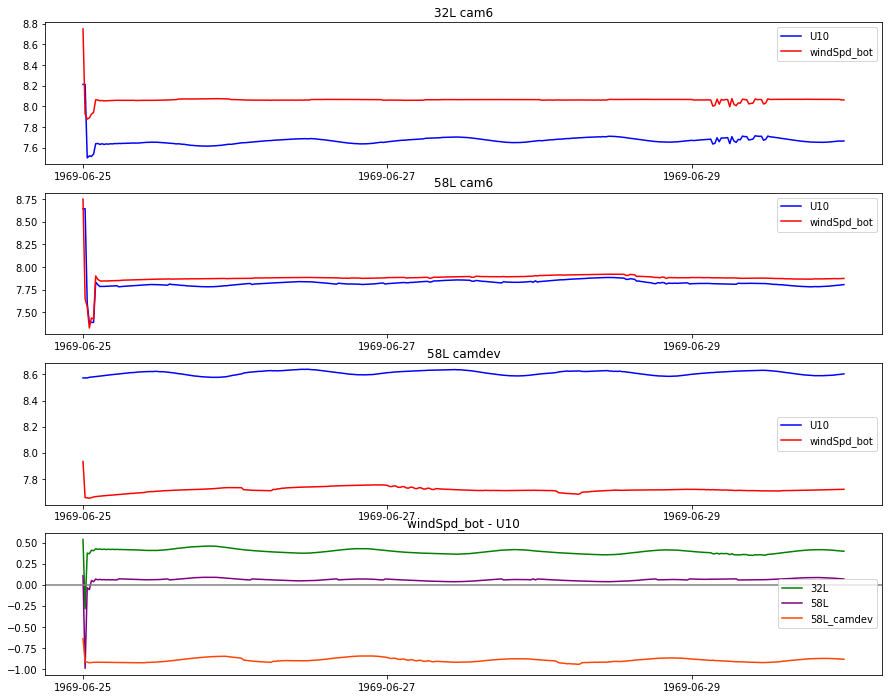

In [13]:
fig,axs = plt.subplots(4,1, figsize=(15,12))
axs = axs.ravel()

axs[0].plot(atmh0_32.time.values, np.squeeze(atmh0_32.U10.values), 'b-', label='U10')
axs[0].plot(atmh0_32.time.values, np.squeeze(atmh0_32.windSpeed.isel(lev=-1).values), 'r-', label='windSpd_bot')
# axs[0].plot(atmh0_32.time.values, np.squeeze(iopDS_windMag), 'k--', label='IOP_windSrf')
axs[0].legend()
axs[0].set_title('32L cam6')


axs[1].plot(atmh0_58.time.values, np.squeeze(atmh0_58.U10.values), 'b-', label='U10')
axs[1].plot(atmh0_58.time.values, np.squeeze(atmh0_58.windSpeed.isel(lev=-1).values), 'r-', label='windSpd_bot')
# axs[1].plot(atmh0_58.time.values, np.squeeze(iopDS_windMag), 'k--', label='IOP_windSrf')
axs[1].legend()
axs[1].set_title('58L cam6')

axs[2].plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev.U10.values), 'b-', label='U10')
axs[2].plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev.windSpeed.isel(lev=-1).values), 'r-', label='windSpd_bot')
axs[2].legend()
axs[2].set_title('58L camdev')

axs[3].plot(atmh0_32.time.values, np.squeeze(atmh0_32.windSpeed.isel(lev=-1).values)- np.squeeze(atmh0_32.U10.values), 
            color='green', label='32L' )
axs[3].plot(atmh0_58.time.values, np.squeeze(atmh0_58.windSpeed.isel(lev=-1).values)- np.squeeze(atmh0_58.U10.values), 
            color='purple', label='58L' )
axs[3].plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev.windSpeed.isel(lev=-1).values)- np.squeeze(atmh0_58camdev.U10.values), 
            color='orangered', label='58L_camdev' )
axs[3].axhline(0, color='grey')
axs[3].legend()
axs[3].set_title('windSpd_bot - U10')

In [14]:
print('Mean U10 (32L): %15.4f\nMean U10 (58L): %15.4f\nMean U10 (58L_camdev): %8.4f' % 
      (np.nanmean(atmh0_32.U10.values), 
       np.nanmean(atmh0_58.U10.values), 
       np.nanmean(atmh0_58camdev.U10.values)) 
     )

print('Mean windSpdBot (32L): %15.4f\nMean windSpdBot (58L): %15.4f\nMean windSpdBot (58L_camdev): %8.4f' % 
      (np.nanmean(np.squeeze(atmh0_32.windSpeed.isel(lev=-1).values)), 
       np.nanmean(np.squeeze(atmh0_58.windSpeed.isel(lev=-1).values)),
       np.nanmean(np.squeeze(atmh0_58camdev.windSpeed.isel(lev=-1).values)))
     )

Mean U10 (32L):          7.6677
Mean U10 (58L):          7.8227
Mean U10 (58L_camdev):   8.6115
Mean windSpdBot (32L):          8.0623
Mean windSpdBot (58L):          7.8795
Mean windSpdBot (58L_camdev):   7.7157


In [12]:
print(atmh0_58camdev.windSpeed.isel(lev=-1).values[60])
print(atmh0_58camdev.U.isel(lev=-1).values[60])

print(atmh0_58camdev.U10.values[60])

[[7.722801]]
[[-7.722801]]
[[8.579004]]


Mean U10 diff (L58-L32): 0.0679
Mean windSpdBot diff (L58-L32): -0.1656


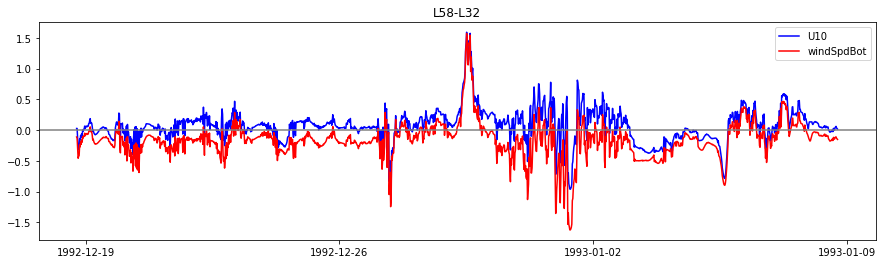

In [8]:
fig,axs = plt.subplots(1,1, figsize=(15,4))

axs.plot(atmh0_32.time.values, np.squeeze(atmh0_58.U10.values)-np.squeeze(atmh0_32.U10.values), 
            color='blue', label='U10' )
axs.plot(atmh0_58.time.values, np.squeeze(atmh0_58.windSpeed.isel(lev=-1).values)-np.squeeze(atmh0_32.windSpeed.isel(lev=-1).values), 
            color='red', label='windSpdBot' )
axs.axhline(0, color='grey')
axs.legend()
axs.set_title('L58-L32')

print('Mean U10 diff (L58-L32): %.4f\nMean windSpdBot diff (L58-L32): %.4f' % 
      (np.nanmean(np.squeeze(atmh0_58.U10.values)-np.squeeze(atmh0_32.U10.values)), 
       np.nanmean(np.squeeze(atmh0_58.windSpeed.isel(lev=-1).values)-np.squeeze(atmh0_32.windSpeed.isel(lev=-1).values)))
     )

## Log files

In [15]:
# iopSel = 'TOGA'
iopSel = 'BOMEX'

if iopSel=='TOGA': 
    log32file = '/glade/work/mdfowler/gust_cam7/U10_logs/atm.log.32L'
    log58file = '/glade/work/mdfowler/gust_cam7/U10_logs/atm.log.58L'
elif iopSel=='BOMEX':
    log32file     = '/glade/work/mdfowler/gust_cam7/U10_logs/atm.log.32L_cam6_BOMEX'
    log58file     = '/glade/work/mdfowler/gust_cam7/U10_logs/atm.log.58L_cam6_BOMEX'
    log58dev_file = '/glade/work/mdfowler/gust_cam7/U10_logs/atm.log.58L_camdev_BOMEX'


In [17]:
with open(log32file) as f32:
    lines32 = f32.readlines()
    
with open(log58file) as f58:
    lines58 = f58.readlines()
    
with open(log58dev_file) as f58dev:
    lines58dev = f58dev.readlines()
    

In [18]:
endTimeLines32    = []
endTimeLines58    = []
endTimeLines58dev = []

for iLines in range(len(lines32)):
    if lines32[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines32 = np.append(endTimeLines32,iLines)
        
for iLines in range(len(lines58)):
    if lines58[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58 = np.append(endTimeLines58,iLines)
        
for iLines in range(len(lines58dev)):
    if lines58dev[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58dev = np.append(endTimeLines58dev,iLines)
        

In [19]:
timestepEnd_zbot32  = []
timestepEnd_thbot32 = []
timestepEnd_qbot32  = []

timestepEnd_tstar32 = []
timestepEnd_qstar32 = []
timestepEnd_ustar32 = []

timestepEnd_holUpdate32 = [] 
timestepEnd_stable32    = []
timestepEnd_xqq32       = []
timestepEnd_psimh32     = []
timestepEnd_alz32       = []
timestepEnd_rdn32       = []
timestepEnd_rd32        = []
timestepEnd_u10n32      = []

for iTimes in range(len(endTimeLines32)):
    
    if iTimes==0: 
        timestepSection = lines32[0:int(endTimeLines32[iTimes])]
    else:
        timestepSection = lines32[int(endTimeLines32[iTimes-1]):int(endTimeLines32[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineTSTAR = [item for item in timestepSection if item.startswith('   MDF: tstar=')]
    lineQSTAR = [item for item in timestepSection if item.startswith('   MDF: qstar=')]
    lineUSTAR = [item for item in timestepSection if item.startswith('   MDF: ustar=')]
    
    lineHOLupdate = [item for item in timestepSection if item.startswith('   MDF: hol(update) =')]
    lineSTABLE    = [item for item in timestepSection if item.startswith('   MDF: stable =')]
    lineXQQ       = [item for item in timestepSection if item.startswith('   MDF: xqq =')]
    linePSIMH     = [item for item in timestepSection if item.startswith('   MDF: psimh =')]
    lineALZ       = [item for item in timestepSection if item.startswith('   MDF: alz =')]
    lineRDN       = [item for item in timestepSection if item.startswith('   MDF: rdn =')]
    lineRD        = [item for item in timestepSection if item.startswith('   MDF: rd =')]
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot32 = np.append(timestepEnd_zbot32, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot32 = np.append(timestepEnd_thbot32, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot32 = np.append(timestepEnd_qbot32, float(strArr_qbot[1]))
        
        ## star values
        strArr_tstar      = lineTSTAR[-1].split('=')
        timestepEnd_tstar32 = np.append(timestepEnd_tstar32, float(strArr_tstar[1]))
        
        strArr_qstar      = lineQSTAR[-1].split('=')
        timestepEnd_qstar32 = np.append(timestepEnd_qstar32, float(strArr_qstar[1]))
        
        strArr_ustar      = lineUSTAR[-1].split('=')
        timestepEnd_ustar32 = np.append(timestepEnd_ustar32, float(strArr_ustar[1]))
        
        ## Other terms 
        strArr_holUpdate      = lineHOLupdate[-1].split('=')
        timestepEnd_holUpdate32 = np.append(timestepEnd_holUpdate32, float(strArr_holUpdate[1]))
        
        strArr_stable      = lineSTABLE[-1].split('=')
        timestepEnd_stable32 = np.append(timestepEnd_stable32, float(strArr_stable[1]))
        
        strArr_xqq      = lineXQQ[-1].split('=')
        timestepEnd_xqq32 = np.append(timestepEnd_xqq32, float(strArr_xqq[1]))
        
        strArr_psimh      = linePSIMH[-1].split('=')
        timestepEnd_psimh32 = np.append(timestepEnd_psimh32, float(strArr_psimh[1]))
        
        strArr_alz      = lineALZ[-1].split('=')
        timestepEnd_alz32 = np.append(timestepEnd_alz32, float(strArr_alz[1]))
        
        strArr_rdn      = lineRDN[-1].split('=')
        timestepEnd_rdn32 = np.append(timestepEnd_rdn32, float(strArr_rdn[1]))
        
        strArr_rd      = lineRD[-1].split('=')
        timestepEnd_rd32 = np.append(timestepEnd_rd32, float(strArr_rd[1]))
        
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n32 = np.append(timestepEnd_u10n32, float(strArr_u10n[1]))


In [20]:
timestepEnd_zbot58  = []
timestepEnd_thbot58 = []
timestepEnd_qbot58  = []

timestepEnd_tstar58 = []
timestepEnd_qstar58 = []
timestepEnd_ustar58 = []

timestepEnd_holUpdate58 = [] 
timestepEnd_stable58    = []
timestepEnd_xqq58       = []
timestepEnd_psimh58     = []
timestepEnd_alz58       = []
timestepEnd_rdn58       = []
timestepEnd_rd58        = []
timestepEnd_u10n58      = []

for iTimes in range(len(endTimeLines58)):
    
    if iTimes==0: 
        timestepSection = lines58[0:int(endTimeLines58[iTimes])]
    else:
        timestepSection = lines58[int(endTimeLines58[iTimes-1]):int(endTimeLines58[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineTSTAR = [item for item in timestepSection if item.startswith('   MDF: tstar=')]
    lineQSTAR = [item for item in timestepSection if item.startswith('   MDF: qstar=')]
    lineUSTAR = [item for item in timestepSection if item.startswith('   MDF: ustar=')]
    
    lineHOLupdate = [item for item in timestepSection if item.startswith('   MDF: hol(update) =')]
    lineSTABLE    = [item for item in timestepSection if item.startswith('   MDF: stable =')]
    lineXQQ       = [item for item in timestepSection if item.startswith('   MDF: xqq =')]
    linePSIMH     = [item for item in timestepSection if item.startswith('   MDF: psimh =')]
    lineALZ       = [item for item in timestepSection if item.startswith('   MDF: alz =')]
    lineRDN       = [item for item in timestepSection if item.startswith('   MDF: rdn =')]
    lineRD        = [item for item in timestepSection if item.startswith('   MDF: rd =')]
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58 = np.append(timestepEnd_zbot58, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58 = np.append(timestepEnd_thbot58, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58 = np.append(timestepEnd_qbot58, float(strArr_qbot[1]))
        
        ## star values
        strArr_tstar      = lineTSTAR[-1].split('=')
        timestepEnd_tstar58 = np.append(timestepEnd_tstar58, float(strArr_tstar[1]))
        
        strArr_qstar      = lineQSTAR[-1].split('=')
        timestepEnd_qstar58 = np.append(timestepEnd_qstar58, float(strArr_qstar[1]))
        
        strArr_ustar      = lineUSTAR[-1].split('=')
        timestepEnd_ustar58 = np.append(timestepEnd_ustar58, float(strArr_ustar[1]))
        
        ## Other terms 
        strArr_holUpdate      = lineHOLupdate[-1].split('=')
        timestepEnd_holUpdate58 = np.append(timestepEnd_holUpdate58, float(strArr_holUpdate[1]))
        
        strArr_stable      = lineSTABLE[-1].split('=')
        timestepEnd_stable58 = np.append(timestepEnd_stable58, float(strArr_stable[1]))
        
        strArr_xqq      = lineXQQ[-1].split('=')
        timestepEnd_xqq58 = np.append(timestepEnd_xqq58, float(strArr_xqq[1]))
        
        strArr_psimh      = linePSIMH[-1].split('=')
        timestepEnd_psimh58 = np.append(timestepEnd_psimh58, float(strArr_psimh[1]))
        
        strArr_alz      = lineALZ[-1].split('=')
        timestepEnd_alz58 = np.append(timestepEnd_alz58, float(strArr_alz[1]))
        
        strArr_rdn      = lineRDN[-1].split('=')
        timestepEnd_rdn58 = np.append(timestepEnd_rdn58, float(strArr_rdn[1]))
        
        strArr_rd      = lineRD[-1].split('=')
        timestepEnd_rd58 = np.append(timestepEnd_rd58, float(strArr_rd[1]))
        
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58 = np.append(timestepEnd_u10n58, float(strArr_u10n[1]))


In [23]:
timestepEnd_zbot58dev  = []
timestepEnd_thbot58dev = []
timestepEnd_qbot58dev  = []

timestepEnd_tstar58dev = []
timestepEnd_qstar58dev = []
timestepEnd_ustar58dev = []

timestepEnd_holUpdate58dev = [] 
timestepEnd_stable58dev    = []
timestepEnd_xqq58dev       = []
timestepEnd_psimh58dev     = []
timestepEnd_alz58dev       = []
timestepEnd_rdn58dev       = []
timestepEnd_rd58dev        = []
timestepEnd_u10n58dev      = []

for iTimes in range(len(endTimeLines58dev)):
    
    if iTimes==0: 
        timestepSection = lines58dev[0:int(endTimeLines58dev[iTimes])]
    else:
        timestepSection = lines58dev[int(endTimeLines58dev[iTimes-1]):int(endTimeLines58dev[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineTSTAR = [item for item in timestepSection if item.startswith('   MDF: tstar=')]
    lineQSTAR = [item for item in timestepSection if item.startswith('   MDF: qstar=')]
    lineUSTAR = [item for item in timestepSection if item.startswith('   MDF: ustar=')]
    
    lineHOLupdate = [item for item in timestepSection if item.startswith('   MDF: hol(update) =')]
    lineSTABLE    = [item for item in timestepSection if item.startswith('   MDF: stable =')]
    lineXQQ       = [item for item in timestepSection if item.startswith('   MDF: xqq =')]
    linePSIMH     = [item for item in timestepSection if item.startswith('   MDF: psimh =')]
    lineALZ       = [item for item in timestepSection if item.startswith('   MDF: alz =')]
    lineRDN       = [item for item in timestepSection if item.startswith('   MDF: rdn =')]
    lineRD        = [item for item in timestepSection if item.startswith('   MDF: rd =')]
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58dev = np.append(timestepEnd_zbot58dev, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58dev = np.append(timestepEnd_thbot58dev, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58dev = np.append(timestepEnd_qbot58dev, float(strArr_qbot[1]))
        
        ## star values
        strArr_tstar      = lineTSTAR[-1].split('=')
        timestepEnd_tstar58dev = np.append(timestepEnd_tstar58dev, float(strArr_tstar[1]))
        
        strArr_qstar      = lineQSTAR[-1].split('=')
        timestepEnd_qstar58dev = np.append(timestepEnd_qstar58dev, float(strArr_qstar[1]))
        
        strArr_ustar      = lineUSTAR[-1].split('=')
        timestepEnd_ustar58dev = np.append(timestepEnd_ustar58dev, float(strArr_ustar[1]))
        
        ## Other terms 
        strArr_holUpdate      = lineHOLupdate[-1].split('=')
        timestepEnd_holUpdate58dev = np.append(timestepEnd_holUpdate58dev, float(strArr_holUpdate[1]))
        
        strArr_stable      = lineSTABLE[-1].split('=')
        timestepEnd_stable58dev = np.append(timestepEnd_stable58dev, float(strArr_stable[1]))
        
        strArr_xqq      = lineXQQ[-1].split('=')
        timestepEnd_xqq58dev = np.append(timestepEnd_xqq58dev, float(strArr_xqq[1]))
        
        strArr_psimh      = linePSIMH[-1].split('=')
        timestepEnd_psimh58dev = np.append(timestepEnd_psimh58dev, float(strArr_psimh[1]))
        
        strArr_alz      = lineALZ[-1].split('=')
        timestepEnd_alz58dev = np.append(timestepEnd_alz58dev, float(strArr_alz[1]))
        
        strArr_rdn      = lineRDN[-1].split('=')
        timestepEnd_rdn58dev = np.append(timestepEnd_rdn58dev, float(strArr_rdn[1]))
        
        strArr_rd      = lineRD[-1].split('=')
        timestepEnd_rd58dev = np.append(timestepEnd_rd58dev, float(strArr_rd[1]))
        
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58dev = np.append(timestepEnd_u10n58dev, float(strArr_u10n[1]))


Text(0.5, 1.0, 'QBOT')

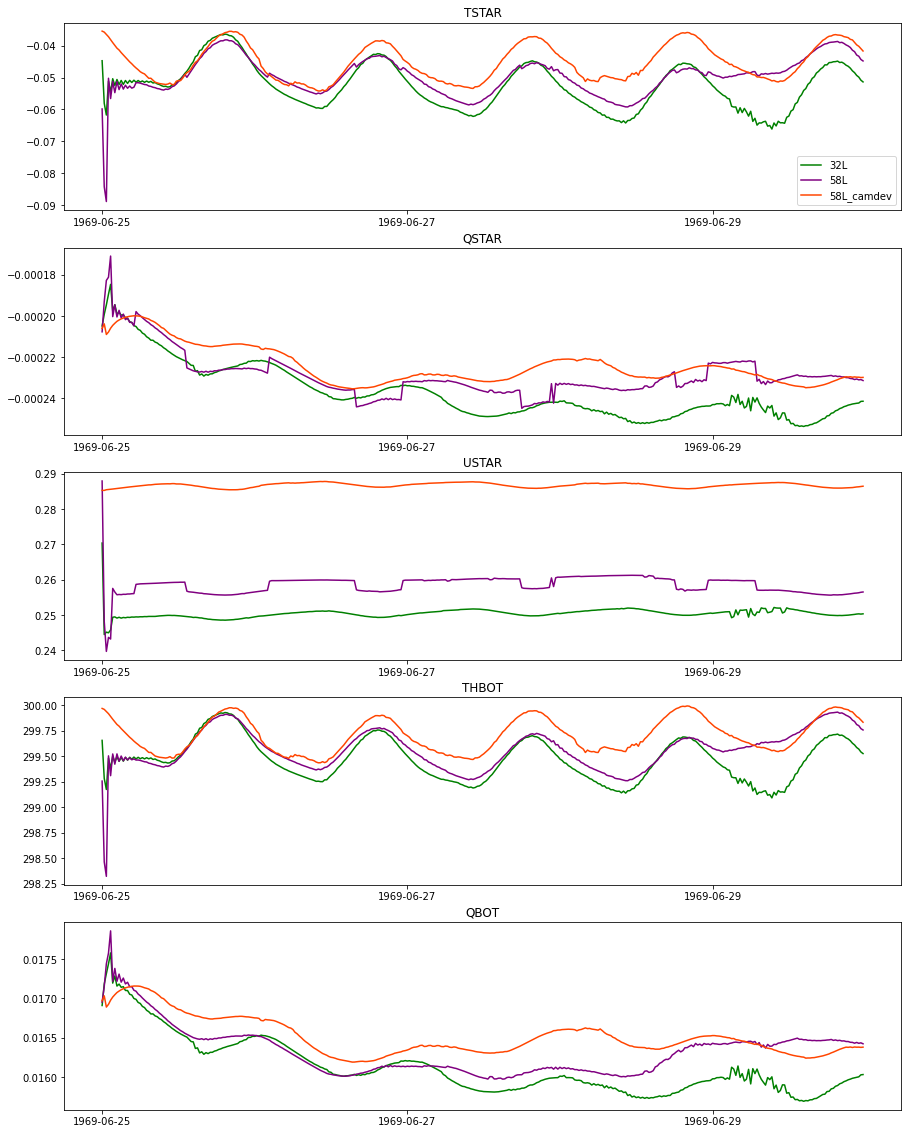

In [26]:
fig,axs = plt.subplots(5,1, figsize=(15,4*5))
axs = axs.ravel()

axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_tstar32), color='green',label='32L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_tstar58), color='purple',label='58L')
axs[0].plot(atmh0_58camdev.time.values[0:-1], np.asarray(timestepEnd_tstar58dev), color='orangered',label='58L_camdev')
axs[0].set_title('TSTAR')
axs[0].legend()

axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qstar32), color='green',label='32L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qstar58), color='purple',label='58L')
axs[1].plot(atmh0_58camdev.time.values[0:-1], np.asarray(timestepEnd_qstar58dev), color='orangered',label='58L_camdev')
axs[1].set_title('QSTAR')

axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_ustar32), color='green',label='32L')
axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_ustar58), color='purple',label='58L')
axs[2].plot(atmh0_58camdev.time.values[0:-1], np.asarray(timestepEnd_ustar58dev), color='orangered',label='58L_camdev')
axs[2].set_title('USTAR')


axs[3].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_thbot32), color='green',label='32L')
axs[3].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_thbot58), color='purple',label='58L')
axs[3].plot(atmh0_58camdev.time.values[0:-1], np.asarray(timestepEnd_thbot58dev), color='orangered',label='58L_camdev')
axs[3].set_title('THBOT')

axs[4].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qbot32), color='green',label='32L')
axs[4].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qbot58), color='purple',label='58L')
axs[4].plot(atmh0_58camdev.time.values[0:-1], np.asarray(timestepEnd_qbot58dev), color='orangered',label='58L_camdev')
axs[4].set_title('QBOT')

# axs[5].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_holUpdate58), color='green',label='32L')
# axs[5].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_holUpdate58),'--', color='purple',label='58L')
# axs[5].set_title('hol')



Text(0.5, 1.0, 'QSTAR')

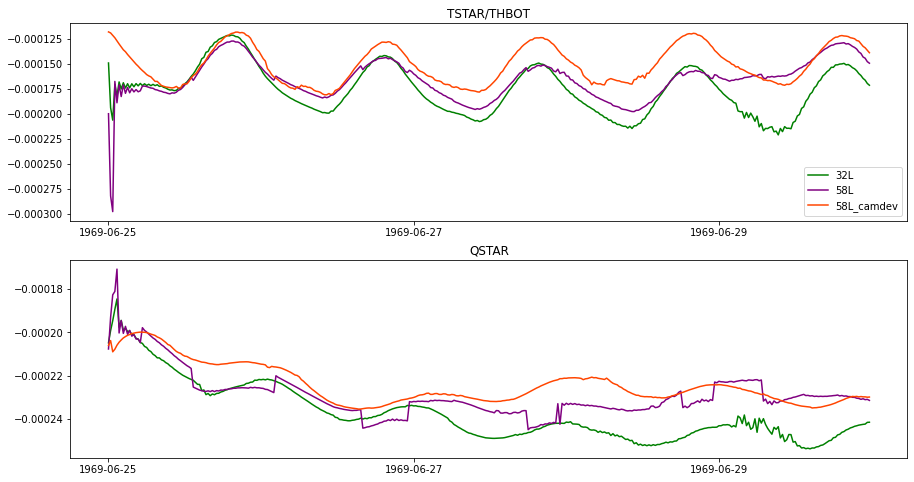

In [28]:
fig,axs = plt.subplots(2,1, figsize=(15,4*2))
axs = axs.ravel()

axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_tstar32/timestepEnd_thbot32), color='green',label='32L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_tstar58/timestepEnd_thbot58), color='purple',label='58L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_tstar58dev/timestepEnd_thbot58dev), color='orangered',label='58L_camdev')
axs[0].set_title('TSTAR/THBOT')
axs[0].legend()

axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qstar32), color='green',label='32L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qstar58), color='purple',label='58L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_qstar58dev), color='orangered',label='58L_camdev')
axs[1].set_title('QSTAR')




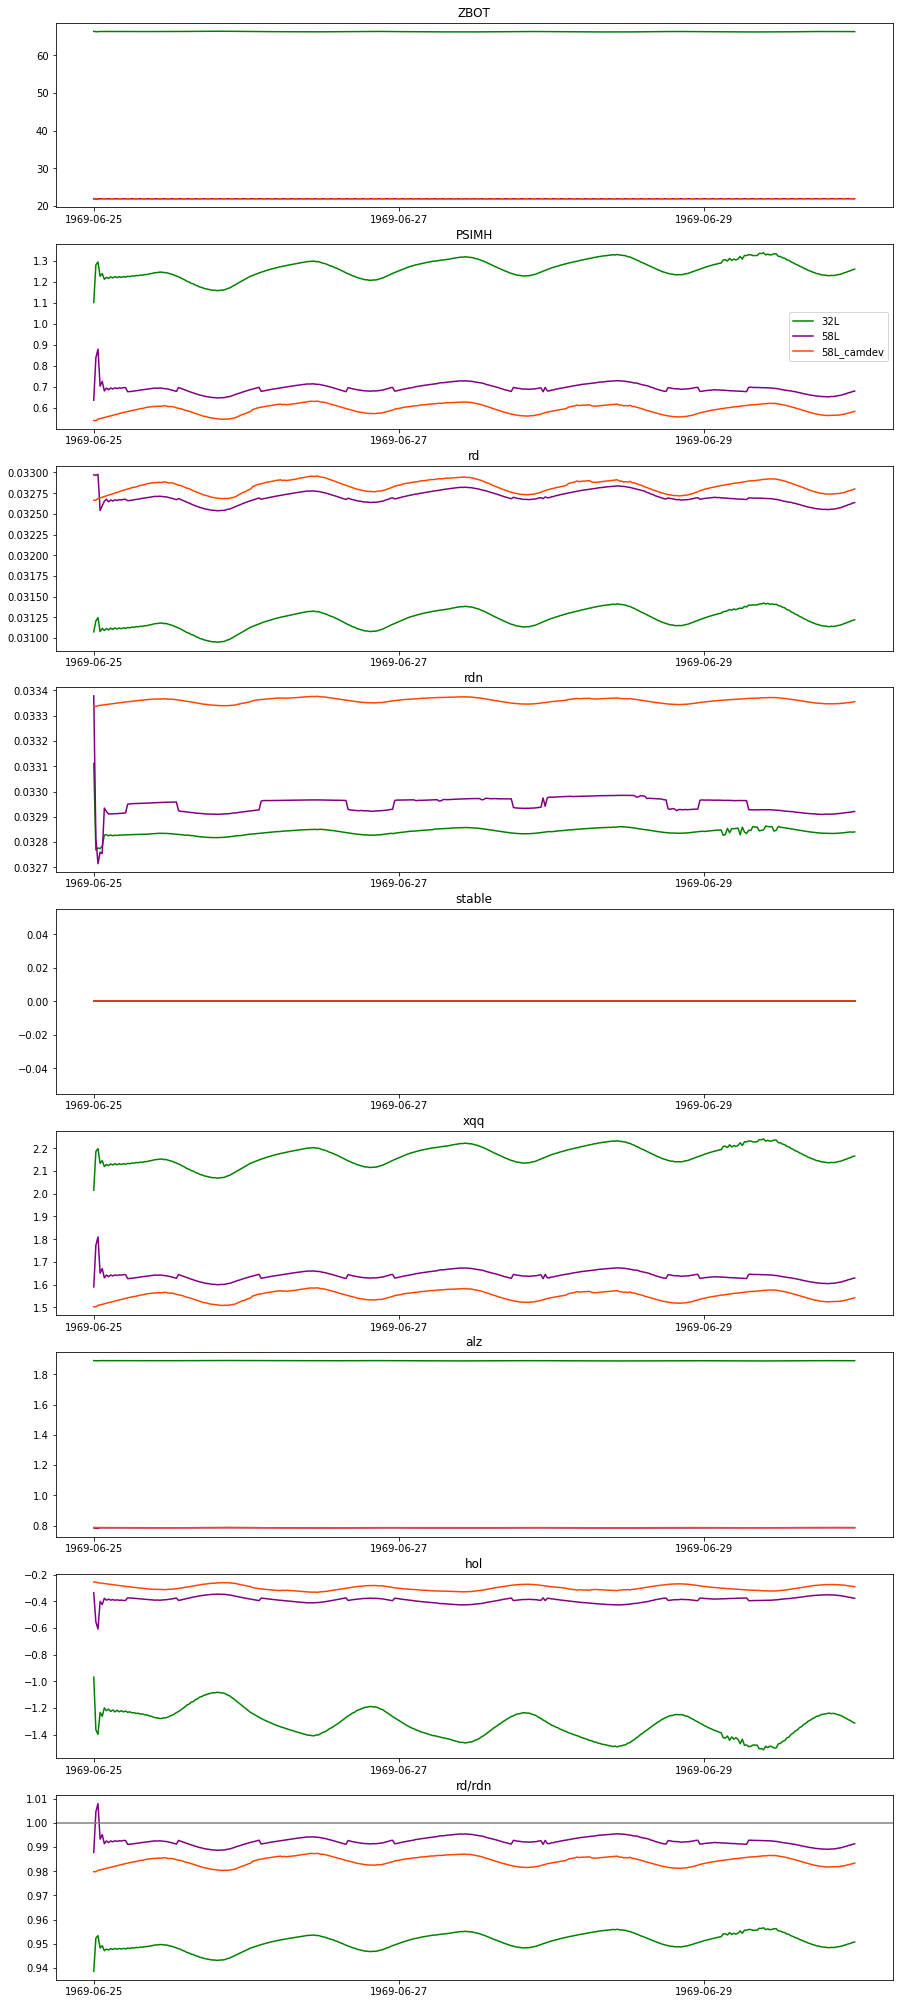

In [34]:
fig,axs = plt.subplots(9,1, figsize=(15,4*9))
axs = axs.ravel()

axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_zbot32), color='green',label='32L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_zbot58), color='purple',label='58L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_zbot58dev),'--', color='orangered',label='58L_camdev')
axs[0].set_title('ZBOT')

axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_psimh32), color='green',label='32L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_psimh58), color='purple',label='58L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_psimh58dev), color='orangered',label='58L_camdev')
axs[1].set_title('PSIMH')
axs[1].legend()


axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd32), color='green',label='32L')
axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd58), color='purple',label='58L')
axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd58dev), color='orangered',label='58L_camdev')
axs[2].set_title('rd')

axs[3].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rdn32), color='green',label='32L')
axs[3].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rdn58), color='purple',label='58L')
axs[3].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rdn58dev), color='orangered',label='58L_camdev')
axs[3].set_title('rdn')

axs[4].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_stable32), color='green',label='32L')
axs[4].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_stable58), color='purple',label='58L')
axs[4].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_stable58dev), color='orangered',label='58L_camdev')
axs[4].set_title('stable')

axs[5].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_xqq32), color='green',label='32L')
axs[5].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_xqq58), color='purple',label='58L')
axs[5].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_xqq58dev), color='orangered',label='58L_camdev')
axs[5].set_title('xqq')

axs[6].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz32), color='green',label='32L')
axs[6].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz58), color='purple',label='58L')
axs[6].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz58dev), color='orangered',label='58L_camdev')
axs[6].set_title('alz')

axs[7].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_holUpdate32), color='green',label='32L')
axs[7].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_holUpdate58), color='purple',label='58L')
axs[7].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_holUpdate58dev), color='orangered',label='58L_camdev')
axs[7].set_title('hol')

axs[8].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd32/timestepEnd_rdn32), color='green',label='32L')
axs[8].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd58/timestepEnd_rdn58), color='purple',label='58L')
axs[8].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_rd58dev/timestepEnd_rdn58dev), color='orangered',label='58L_camdev')
axs[8].set_title('rd/rdn')
axs[8].axhline(1, color='grey')


# axs[7].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz32-timestepEnd_psimh32), color='green',label='32L')
# axs[7].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz58-timestepEnd_psimh58), color='purple',label='58L')
# axs[7].set_title('alz-psimh')


In [32]:
print('%.4f' % np.nanmean(timestepEnd_rd32/timestepEnd_rdn32))
print('%.4f' % np.nanmean(timestepEnd_rd58/timestepEnd_rdn58))
print('%.4f' % np.nanmean(timestepEnd_rd58dev/timestepEnd_rdn58dev))

0.9508
0.9924
0.9842


In [8]:

def psimhu(X): 
    import numpy as np 
    
    psimhu = 2*np.log((1+X)/2) + np.log((1+X**2)/2) - 2*np.arctan(X) + (np.pi/2)
    
    return psimhu
    
    
hol = -0.5 


x1 = (1-(16*hol))**(1/4) 
print(' Value of X (default): %.4f' % x1)
print(' Value of psimhu: %.4f' % psimhu(x1))


x2 = (1-(22*hol))**(1/4) 
print(' Value of X (increase C3): %.4f' % x2)
print(' Value of psimhu: %.4f' % psimhu(x2))




 Value of X (default): 1.7321
 Value of psimhu: 0.7934
 Value of X (increase C3): 1.8612
 Value of psimhu: 0.9344


Text(0.5, 1.0, 'rdn / k*(alz-psimh)')

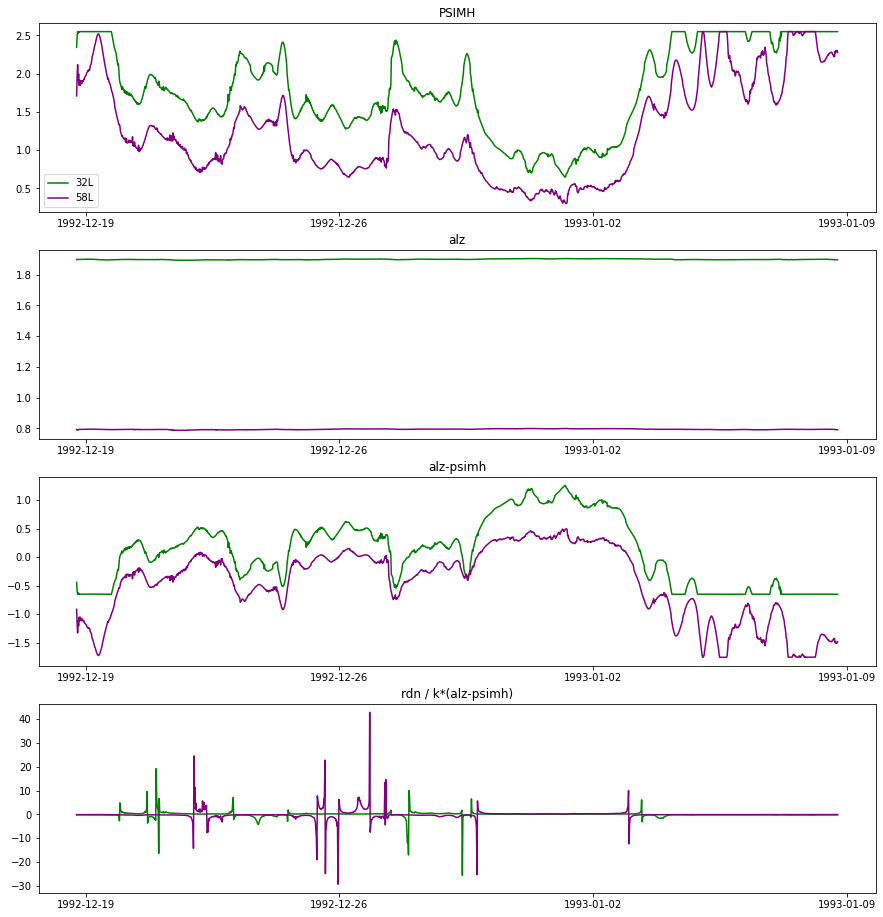

In [18]:
fig,axs = plt.subplots(4,1, figsize=(15,4*4))
axs = axs.ravel()

# axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_zbot32), color='green',label='32L')
# axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_zbot58), color='purple',label='58L')
# axs[0].set_title('ZBOT')

axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_psimh32), color='green',label='32L')
axs[0].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_psimh58), color='purple',label='58L')
axs[0].set_title('PSIMH')
axs[0].legend()

axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz32), color='green',label='32L')
axs[1].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz58), color='purple',label='58L')
axs[1].set_title('alz')

axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz32-timestepEnd_psimh32), color='green',label='32L')
axs[2].plot(atmh0_58.time.values[0:-1], np.asarray(timestepEnd_alz58-timestepEnd_psimh58), color='purple',label='58L')
axs[2].set_title('alz-psimh')

axs[3].plot(atmh0_58.time.values[0:-1], timestepEnd_rdn32/(0.4*np.asarray(timestepEnd_alz32-timestepEnd_psimh32)), color='green',label='32L')
axs[3].plot(atmh0_58.time.values[0:-1], timestepEnd_rdn58/(0.4*np.asarray(timestepEnd_alz58-timestepEnd_psimh58)), color='purple',label='58L')
axs[3].set_title('rdn / k*(alz-psimh)')


## Dig into BOMEX case more... 

**CAMDEV case with 58L**

In [2]:
## 58L camdev case (where things really didn't make sense) 
dir_58Lcamdev3 = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_camdev_print003/'

atmFile_58camdev3 = np.sort(glob.glob(dir_58Lcamdev3+'atm/hist/*h0*'))
atmh0_58camdev3   = xr.open_dataset(atmFile_58camdev3[0], decode_times=True)
    
atmh0_58camdev3_windSpd = np.sqrt( (atmh0_58camdev3['U'].values**2) + (atmh0_58camdev3['V'].values**2) )
atmh0_58camdev3['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58camdev3_windSpd)

In [3]:
dataDir = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_camdev_print003/'

logFile3 = dataDir+'logs/atm.log.3746941.chadmin1.ib0.cheyenne.ucar.edu.220412-123052'

with open(logFile3) as f58dev3:
    lines58dev3 = f58dev3.readlines()
    
endTimeLines58dev3 = []

for iLines in range(len(lines58dev3)):
    if lines58dev3[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58dev3 = np.append(endTimeLines58dev3,iLines)
        

**CAM6 case with 58L**

In [4]:
## 58L camdev case (where things really didn't make sense) 
dir_58L_v3 = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_cam6_print003/'

atmFile_58_v3 = np.sort(glob.glob(dir_58L_v3+'atm/hist/*h0*'))
atmh0_58_v3   = xr.open_dataset(atmFile_58_v3[0], decode_times=True)
    
atmh0_58_v3_windSpd = np.sqrt( (atmh0_58_v3['U'].values**2) + (atmh0_58_v3['V'].values**2) )
atmh0_58_v3['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58_v3_windSpd)



In [5]:
dataDir = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestBOMEX_U10dive.58L_cam6_print003/'

logFile_v3 = dataDir+'logs/atm.log.3747578.chadmin1.ib0.cheyenne.ucar.edu.220412-130540'

with open(logFile_v3) as f58_v3:
    lines58_v3 = f58_v3.readlines()
    
endTimeLines58_v3 = []

for iLines in range(len(lines58_v3)):
    if lines58_v3[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58_v3 = np.append(endTimeLines58_v3,iLines)
        

*Read info from log files*

In [6]:
timestepEnd_zbot58dev3  = []
timestepEnd_thbot58dev3 = []
timestepEnd_qbot58dev3 = []

timestepEnd_tstar58dev3 = []
timestepEnd_qstar58dev3 = []
timestepEnd_ustar58dev3 = []

timestepEnd_holUpdate58dev3 = [] 
timestepEnd_stable58dev3    = []
timestepEnd_xqq58dev3       = []
timestepEnd_psimh58dev3     = []
timestepEnd_alz58dev3       = []
timestepEnd_rdn58dev3       = []
timestepEnd_rd58dev3        = []
timestepEnd_u10n58dev3      = []

timestepEnd_vmag58dev3      = []
timestepEnd_ubot58dev3      = []
timestepEnd_vbot58dev3      = []
timestepEnd_us58dev3      = []
# timestepEnd_vs58dev3      = []

for iTimes in range(len(endTimeLines58dev3)):
    
    if iTimes==0: 
        timestepSection = lines58dev3[0:int(endTimeLines58dev3[iTimes])]
    else:
        timestepSection = lines58dev3[int(endTimeLines58dev3[iTimes-1]):int(endTimeLines58dev3[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    # lineVS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) =')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineTSTAR = [item for item in timestepSection if item.startswith('   MDF: tstar=')]
    lineQSTAR = [item for item in timestepSection if item.startswith('   MDF: qstar=')]
    lineUSTAR = [item for item in timestepSection if item.startswith('   MDF: ustar=')]
    
    lineHOLupdate = [item for item in timestepSection if item.startswith('   MDF: hol(update) =')]
    lineSTABLE    = [item for item in timestepSection if item.startswith('   MDF: stable =')]
    lineXQQ       = [item for item in timestepSection if item.startswith('   MDF: xqq =')]
    linePSIMH     = [item for item in timestepSection if item.startswith('   MDF: psimh =')]
    lineALZ       = [item for item in timestepSection if item.startswith('   MDF: alz =')]
    lineRDN       = [item for item in timestepSection if item.startswith('   MDF: rdn =')]
    lineRD        = [item for item in timestepSection if item.startswith('   MDF: rd =')]
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58dev3 = np.append(timestepEnd_vmag58dev3, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58dev3 = np.append(timestepEnd_ubot58dev3, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58dev3 = np.append(timestepEnd_vbot58dev3, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58dev3 = np.append(timestepEnd_us58dev3, float(strArr_us[1]))
        
        # strArr_vs      = lineVS[1].split('=')
        # timestepEnd_vs58dev3 = np.append(timestepEnd_vs58dev3, float(strArr_vs[1]))
        
        
        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58dev3 = np.append(timestepEnd_zbot58dev3, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58dev3 = np.append(timestepEnd_thbot58dev3, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58dev3 = np.append(timestepEnd_qbot58dev3, float(strArr_qbot[1]))
        
        ## star values
        strArr_tstar      = lineTSTAR[-1].split('=')
        timestepEnd_tstar58dev3 = np.append(timestepEnd_tstar58dev3, float(strArr_tstar[1]))
        
        strArr_qstar      = lineQSTAR[-1].split('=')
        timestepEnd_qstar58dev3 = np.append(timestepEnd_qstar58dev3, float(strArr_qstar[1]))
        
        strArr_ustar      = lineUSTAR[-1].split('=')
        timestepEnd_ustar58dev3 = np.append(timestepEnd_ustar58dev3, float(strArr_ustar[1]))
        
        ## Other terms 
        strArr_holUpdate      = lineHOLupdate[-1].split('=')
        timestepEnd_holUpdate58dev3 = np.append(timestepEnd_holUpdate58dev3, float(strArr_holUpdate[1]))
        
        strArr_stable      = lineSTABLE[-1].split('=')
        timestepEnd_stable58dev3 = np.append(timestepEnd_stable58dev3, float(strArr_stable[1]))
        
        strArr_xqq      = lineXQQ[-1].split('=')
        timestepEnd_xqq58dev3 = np.append(timestepEnd_xqq58dev3, float(strArr_xqq[1]))
        
        strArr_psimh      = linePSIMH[-1].split('=')
        timestepEnd_psimh58dev3 = np.append(timestepEnd_psimh58dev3, float(strArr_psimh[1]))
        
        strArr_alz      = lineALZ[-1].split('=')
        timestepEnd_alz58dev3 = np.append(timestepEnd_alz58dev3, float(strArr_alz[1]))
        
        strArr_rdn      = lineRDN[-1].split('=')
        timestepEnd_rdn58dev3 = np.append(timestepEnd_rdn58dev3, float(strArr_rdn[1]))
        
        strArr_rd      = lineRD[-1].split('=')
        timestepEnd_rd58dev3 = np.append(timestepEnd_rd58dev3, float(strArr_rd[1]))
        
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58dev3 = np.append(timestepEnd_u10n58dev3, float(strArr_u10n[1]))


In [7]:
timestepEnd_zbot58v3  = []
timestepEnd_thbot58v3 = []
timestepEnd_qbot58v3 = []

timestepEnd_tstar58v3 = []
timestepEnd_qstar58v3 = []
timestepEnd_ustar58v3 = []

timestepEnd_holUpdate58v3 = [] 
timestepEnd_stable58v3    = []
timestepEnd_xqq58v3       = []
timestepEnd_psimh58v3     = []
timestepEnd_alz58v3       = []
timestepEnd_rdn58v3       = []
timestepEnd_rd58v3        = []
timestepEnd_u10n58v3      = []

timestepEnd_vmag58v3      = []
timestepEnd_ubot58v3      = []
timestepEnd_vbot58v3      = []
timestepEnd_us58v3      = []
# timestepEnd_vs58dev3      = []

for iTimes in range(len(endTimeLines58_v3)):
    
    if iTimes==0: 
        timestepSection = lines58_v3[0:int(endTimeLines58_v3[iTimes])]
    else:
        timestepSection = lines58_v3[int(endTimeLines58_v3[iTimes-1]):int(endTimeLines58_v3[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    # lineVS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) =')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineTSTAR = [item for item in timestepSection if item.startswith('   MDF: tstar=')]
    lineQSTAR = [item for item in timestepSection if item.startswith('   MDF: qstar=')]
    lineUSTAR = [item for item in timestepSection if item.startswith('   MDF: ustar=')]
    
    lineHOLupdate = [item for item in timestepSection if item.startswith('   MDF: hol(update) =')]
    lineSTABLE    = [item for item in timestepSection if item.startswith('   MDF: stable =')]
    lineXQQ       = [item for item in timestepSection if item.startswith('   MDF: xqq =')]
    linePSIMH     = [item for item in timestepSection if item.startswith('   MDF: psimh =')]
    lineALZ       = [item for item in timestepSection if item.startswith('   MDF: alz =')]
    lineRDN       = [item for item in timestepSection if item.startswith('   MDF: rdn =')]
    lineRD        = [item for item in timestepSection if item.startswith('   MDF: rd =')]
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58v3 = np.append(timestepEnd_vmag58v3, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58v3 = np.append(timestepEnd_ubot58v3, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58v3 = np.append(timestepEnd_vbot58v3, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58v3 = np.append(timestepEnd_us58v3, float(strArr_us[1]))
        
        # strArr_vs      = lineVS[1].split('=')
        # timestepEnd_vs58dev3 = np.append(timestepEnd_vs58dev3, float(strArr_vs[1]))
        
        
        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58v3 = np.append(timestepEnd_zbot58v3, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58v3 = np.append(timestepEnd_thbot58v3, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58v3 = np.append(timestepEnd_qbot58v3, float(strArr_qbot[1]))
        
        ## star values
        strArr_tstar      = lineTSTAR[-1].split('=')
        timestepEnd_tstar58v3 = np.append(timestepEnd_tstar58v3, float(strArr_tstar[1]))
        
        strArr_qstar      = lineQSTAR[-1].split('=')
        timestepEnd_qstar58v3 = np.append(timestepEnd_qstar58v3, float(strArr_qstar[1]))
        
        strArr_ustar      = lineUSTAR[-1].split('=')
        timestepEnd_ustar58v3 = np.append(timestepEnd_ustar58v3, float(strArr_ustar[1]))
        
        ## Other terms 
        strArr_holUpdate      = lineHOLupdate[-1].split('=')
        timestepEnd_holUpdate58v3 = np.append(timestepEnd_holUpdate58v3, float(strArr_holUpdate[1]))
        
        strArr_stable      = lineSTABLE[-1].split('=')
        timestepEnd_stable58v3 = np.append(timestepEnd_stable58v3, float(strArr_stable[1]))
        
        strArr_xqq      = lineXQQ[-1].split('=')
        timestepEnd_xqq58v3 = np.append(timestepEnd_xqq58v3, float(strArr_xqq[1]))
        
        strArr_psimh      = linePSIMH[-1].split('=')
        timestepEnd_psimh58v3 = np.append(timestepEnd_psimh58v3, float(strArr_psimh[1]))
        
        strArr_alz      = lineALZ[-1].split('=')
        timestepEnd_alz58v3 = np.append(timestepEnd_alz58v3, float(strArr_alz[1]))
        
        strArr_rdn      = lineRDN[-1].split('=')
        timestepEnd_rdn58v3 = np.append(timestepEnd_rdn58v3, float(strArr_rdn[1]))
        
        strArr_rd      = lineRD[-1].split('=')
        timestepEnd_rd58v3 = np.append(timestepEnd_rd58v3, float(strArr_rd[1]))
        
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58v3 = np.append(timestepEnd_u10n58v3, float(strArr_u10n[1]))


### Read in for TOGA IOP too 


In [8]:
## 58L camdev case (where things really didn't make sense) 
dir_58Lcamdev3_toga = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestTOGA_U10dive.58L_camdev_print003/'

atmFile_58camdev3_toga = np.sort(glob.glob(dir_58Lcamdev3_toga+'atm/hist/*h0*'))
atmh0_58camdev3_toga   = xr.open_dataset(atmFile_58camdev3_toga[0], decode_times=True)
    
atmh0_58camdev3_windSpd_toga = np.sqrt( (atmh0_58camdev3_toga['U'].values**2) + (atmh0_58camdev3_toga['V'].values**2) )
atmh0_58camdev3_toga['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58camdev3_windSpd_toga)


## Open log file
logFileToga = dir_58Lcamdev3_toga+'logs/atm.log.3748107.chadmin1.ib0.cheyenne.ucar.edu.220412-134904'

with open(logFileToga) as f58dev3_Toga:
    lines58dev3_Toga = f58dev3_Toga.readlines()
    
endTimeLines58dev3_Toga = []

for iLines in range(len(lines58dev3_Toga)):
    if lines58dev3_Toga[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58dev3_Toga = np.append(endTimeLines58dev3_Toga,iLines)


In [9]:
timestepEnd_zbot58dev3_toga  = []
timestepEnd_thbot58dev3_toga = []
timestepEnd_qbot58dev3_toga  = []

timestepEnd_u10n58dev3_toga  = []

timestepEnd_vmag58dev3_toga  = []
timestepEnd_ubot58dev3_toga  = []
timestepEnd_vbot58dev3_toga  = []
timestepEnd_us58dev3_toga    = []

for iTimes in range(len(endTimeLines58dev3_Toga)):
    
    if iTimes==0: 
        timestepSection = lines58dev3_Toga[0:int(endTimeLines58dev3_Toga[iTimes])]
    else:
        timestepSection = lines58dev3_Toga[int(endTimeLines58dev3_Toga[iTimes-1]):int(endTimeLines58dev3_Toga[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58dev3_toga = np.append(timestepEnd_vmag58dev3_toga, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58dev3_toga = np.append(timestepEnd_ubot58dev3_toga, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58dev3_toga = np.append(timestepEnd_vbot58dev3_toga, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58dev3_toga = np.append(timestepEnd_us58dev3_toga, float(strArr_us[1]))

        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58dev3_toga = np.append(timestepEnd_zbot58dev3_toga, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58dev3_toga = np.append(timestepEnd_thbot58dev3_toga, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58dev3_toga = np.append(timestepEnd_qbot58dev3_toga, float(strArr_qbot[1]))
        
        
        ## Other terms 
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58dev3_toga = np.append(timestepEnd_u10n58dev3_toga, float(strArr_u10n[1]))


In [10]:
## 58L camdev case (where things really didn't make sense) 
dir_58Lcam_v3_toga = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestTOGA_U10dive.58L_cam6_print003/'

atmFile_58cam_v3_toga = np.sort(glob.glob(dir_58Lcam_v3_toga+'atm/hist/*h0*'))
atmh0_58cam_v3_toga   = xr.open_dataset(atmFile_58cam_v3_toga[0], decode_times=True)
    
atmh0_58cam_v3_windSpd_toga = np.sqrt( (atmh0_58cam_v3_toga['U'].values**2) + (atmh0_58cam_v3_toga['V'].values**2) )
atmh0_58cam_v3_toga['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58cam_v3_windSpd_toga)


## Open log file
logFilev3Toga = dir_58Lcam_v3_toga+'logs/atm.log.3748522.chadmin1.ib0.cheyenne.ucar.edu.220412-140252'

with open(logFilev3Toga) as f58v3_Toga:
    lines58v3_Toga = f58v3_Toga.readlines()
    
endTimeLines58v3_Toga = []

for iLines in range(len(lines58v3_Toga)):
    if lines58v3_Toga[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58v3_Toga = np.append(endTimeLines58v3_Toga,iLines)


In [11]:
timestepEnd_zbot58v3_toga  = []
timestepEnd_thbot58v3_toga = []
timestepEnd_qbot58v3_toga  = []

timestepEnd_u10n58v3_toga  = []

timestepEnd_vmag58v3_toga  = []
timestepEnd_ubot58v3_toga  = []
timestepEnd_vbot58v3_toga  = []
timestepEnd_us58v3_toga    = []

for iTimes in range(len(endTimeLines58v3_Toga)):
    
    if iTimes==0: 
        timestepSection = lines58v3_Toga[0:int(endTimeLines58v3_Toga[iTimes])]
    else:
        timestepSection = lines58v3_Toga[int(endTimeLines58v3_Toga[iTimes-1]):int(endTimeLines58v3_Toga[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58v3_toga = np.append(timestepEnd_vmag58v3_toga, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58v3_toga = np.append(timestepEnd_ubot58v3_toga, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58v3_toga = np.append(timestepEnd_vbot58v3_toga, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58v3_toga = np.append(timestepEnd_us58v3_toga, float(strArr_us[1]))

        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58v3_toga = np.append(timestepEnd_zbot58v3_toga, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58v3_toga = np.append(timestepEnd_thbot58v3_toga, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58v3_toga = np.append(timestepEnd_qbot58v3_toga, float(strArr_qbot[1]))
        
        
        ## Other terms 
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58v3_toga = np.append(timestepEnd_u10n58v3_toga, float(strArr_u10n[1]))


### Read in for CGILSs6 IOP too 

In [30]:
## 58L camdev case (where things really didn't make sense) 
dir_58Lcamdev3_cgils = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestCGILSs6_U10dive.58L_camdev_print003/'

atmFile_58camdev3_cgils = np.sort(glob.glob(dir_58Lcamdev3_cgils+'atm/hist/*h0*'))
atmh0_58camdev3_cgils   = xr.open_dataset(atmFile_58camdev3_cgils[0], decode_times=True)
    
atmh0_58camdev3_windSpd_cgils = np.sqrt( (atmh0_58camdev3_cgils['U'].values**2) + (atmh0_58camdev3_cgils['V'].values**2) )
atmh0_58camdev3_cgils['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58camdev3_windSpd_cgils)


## Open log file
logFileCgils = dir_58Lcamdev3_cgils+'logs/atm.log.3762431.chadmin1.ib0.cheyenne.ucar.edu.220413-153328'

with open(logFileCgils) as f58dev3_Cgils:
    lines58dev3_Cgils = f58dev3_Cgils.readlines()
    
endTimeLines58dev3_Cgils = []

for iLines in range(len(lines58dev3_Cgils)):
    if lines58dev3_Cgils[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58dev3_Cgils = np.append(endTimeLines58dev3_Cgils,iLines)


In [31]:
timestepEnd_zbot58dev3_cgils  = []
timestepEnd_thbot58dev3_cgils = []
timestepEnd_qbot58dev3_cgils  = []

timestepEnd_u10n58dev3_cgils  = []

timestepEnd_vmag58dev3_cgils  = []
timestepEnd_ubot58dev3_cgils  = []
timestepEnd_vbot58dev3_cgils  = []
timestepEnd_us58dev3_cgils    = []

for iTimes in range(len(endTimeLines58dev3_Cgils)):
    
    if iTimes==0: 
        timestepSection = lines58dev3_Cgils[0:int(endTimeLines58dev3_Cgils[iTimes])]
    else:
        timestepSection = lines58dev3_Cgils[int(endTimeLines58dev3_Cgils[iTimes-1]):int(endTimeLines58dev3_Cgils[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58dev3_cgils = np.append(timestepEnd_vmag58dev3_cgils, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58dev3_cgils = np.append(timestepEnd_ubot58dev3_cgils, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58dev3_cgils = np.append(timestepEnd_vbot58dev3_cgils, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58dev3_cgils = np.append(timestepEnd_us58dev3_cgils, float(strArr_us[1]))

        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58dev3_cgils = np.append(timestepEnd_zbot58dev3_cgils, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58dev3_cgils = np.append(timestepEnd_thbot58dev3_cgils, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58dev3_cgils = np.append(timestepEnd_qbot58dev3_cgils, float(strArr_qbot[1]))
        
        
        ## Other terms 
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58dev3_cgils = np.append(timestepEnd_u10n58dev3_cgils, float(strArr_u10n[1]))


In [34]:
len(timestepEnd_vmag58dev3_cgils)

2160

In [35]:
atmh0_58camdev3_cgils.time.values

array([cftime.DatetimeNoLeap(1997, 7, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 7, 15, 0, 20, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 7, 15, 0, 40, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(1997, 8, 12, 23, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 8, 12, 23, 20, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 8, 12, 23, 40, 0, 0, has_year_zero=True)],
      dtype=object)

In [24]:
## 58L camdev case (where things really didn't make sense) 
dir_58Lcam_v3_cgils = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestCGILSs6_U10dive.58L_cam6_print003/'

atmFile_58cam_v3_arm = np.sort(glob.glob(dir_58Lcam_v3_arm+'atm/hist/*h0*'))
atmh0_58cam_v3_arm   = xr.open_dataset(atmFile_58cam_v3_arm[0], decode_times=True)
    
atmh0_58cam_v3_windSpd_arm = np.sqrt( (atmh0_58cam_v3_arm['U'].values**2) + (atmh0_58cam_v3_arm['V'].values**2) )
atmh0_58cam_v3_arm['windSpeed'] = ( ('time','lev','lat','lon'), atmh0_58cam_v3_windSpd_arm)


## Open log file
logFilev3arm = dir_58Lcam_v3_arm+'logs/atm.log.3762506.chadmin1.ib0.cheyenne.ucar.edu.220413-153808'

with open(logFilev3arm) as f58v3_Arm:
    lines58v3_Arm = f58v3_Arm.readlines()
    
endTimeLines58v3_Arm = []

for iLines in range(len(lines58v3_Arm)):
    if lines58v3_Arm[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines58v3_Arm = np.append(endTimeLines58v3_Arm,iLines)


In [25]:
timestepEnd_zbot58v3_arm  = []
timestepEnd_thbot58v3_arm = []
timestepEnd_qbot58v3_arm  = []

timestepEnd_u10n58v3_arm  = []

timestepEnd_vmag58v3_arm  = []
timestepEnd_ubot58v3_arm  = []
timestepEnd_vbot58v3_arm  = []
timestepEnd_us58v3_arm    = []

for iTimes in range(len(endTimeLines58v3_Arm)):
    
    if iTimes==0: 
        timestepSection = lines58v3_Arm[0:int(endTimeLines58v3_Arm[iTimes])]
    else:
        timestepSection = lines58v3_Arm[int(endTimeLines58v3_Arm[iTimes-1]):int(endTimeLines58v3_Arm[iTimes])]
        
    ## Use values at end of time-step iteration 
    lineVMAG   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vmag =')]
    lineUBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, ubot(n) =')]
    lineVBOT   = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vbot(n) =')]
    lineUS     = [item for item in timestepSection if item.startswith(' MDF:  Top of itr, vs(n) = us')]
    
    lineZBOT   = [item for item in timestepSection if item.startswith('   MDF: zbot=')]
    lineTHBOT  = [item for item in timestepSection if item.startswith('   MDF: thbot=')]
    lineQBOT   = [item for item in timestepSection if item.startswith('   MDF: qbot=')]
            
    lineU10N      = [item for item in timestepSection if item.startswith('   MDF: u10n =')]
    
    if len(lineZBOT)>0:
        ## VMAG related values
        strArr_vmag      = lineVMAG[0].split('=')
        timestepEnd_vmag58v3_arm = np.append(timestepEnd_vmag58v3_arm, float(strArr_vmag[1]))
        
        strArr_ubot      = lineUBOT[0].split('=')
        timestepEnd_ubot58v3_arm = np.append(timestepEnd_ubot58v3_arm, float(strArr_ubot[1]))
        
        strArr_vbot      = lineVBOT[0].split('=')
        timestepEnd_vbot58v3_arm = np.append(timestepEnd_vbot58v3_arm, float(strArr_vbot[1]))
        
        strArr_us      = lineUS[0].split('us')
        timestepEnd_us58v3_arm = np.append(timestepEnd_us58v3_arm, float(strArr_us[1]))

        
        ## Bot values
        strArr_zbot      = lineZBOT[-1].split('=')
        timestepEnd_zbot58v3_arm = np.append(timestepEnd_zbot58v3_arm, float(strArr_zbot[1]))
        
        strArr_thbot      = lineTHBOT[-1].split('=')
        timestepEnd_thbot58v3_arm = np.append(timestepEnd_thbot58v3_arm, float(strArr_thbot[1]))
        
        strArr_qbot      = lineQBOT[-1].split('=')
        timestepEnd_qbot58v3_arm = np.append(timestepEnd_qbot58v3_arm, float(strArr_qbot[1]))
        
        
        ## Other terms 
        strArr_u10n      = lineU10N[-1].split('=')
        timestepEnd_u10n58v3_arm = np.append(timestepEnd_u10n58v3_arm, float(strArr_u10n[1]))


### Make some plots

(-2.0, 12.0)

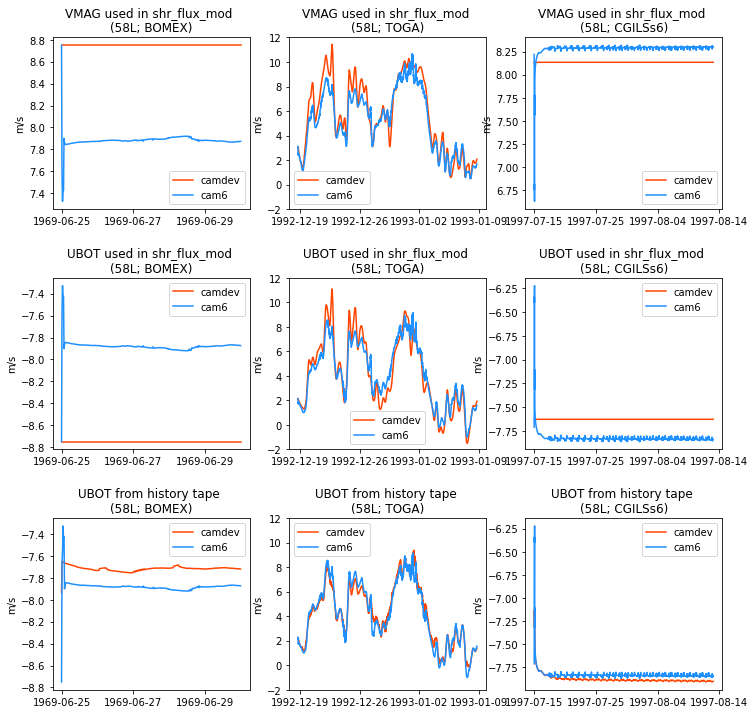

In [40]:
fig,axs = plt.subplots(3,3, figsize=(12,12))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(atmh0_58camdev3.time.values[0:-1], timestepEnd_vmag58dev3, color='orangered', label='camdev')
axs[0].plot(atmh0_58_v3.time.values[0:-1],     timestepEnd_vmag58v3, color='dodgerblue', label='cam6')
axs[0].legend()
axs[0].set_ylabel('m/s')
axs[0].set_title('VMAG used in shr_flux_mod \n(58L; BOMEX)')

axs[1].plot(atmh0_58camdev3_toga.time.values[0:-1], timestepEnd_vmag58dev3_toga, color='orangered', label='camdev')
axs[1].plot(atmh0_58cam_v3_toga.time.values[0:-1],  timestepEnd_vmag58v3_toga, color='dodgerblue', label='cam6')
axs[1].legend()
axs[1].set_ylabel('m/s')
axs[1].set_title('VMAG used in shr_flux_mod \n(58L; TOGA)')

axs[2].plot(atmh0_58camdev3_arm.time.values, timestepEnd_vmag58dev3_arm[0:len(atmh0_58camdev3_cgils.time.values)], color='orangered', label='camdev')
axs[2].plot(atmh0_58cam_v3_arm.time.values,  timestepEnd_vmag58v3_arm[0:len(atmh0_58camdev3_cgils.time.values)], color='dodgerblue', label='cam6')
axs[2].legend()
axs[2].set_ylabel('m/s')
axs[2].set_title('VMAG used in shr_flux_mod \n(58L; CGILSs6)')


axs[3].plot(atmh0_58camdev3.time.values[0:-1], timestepEnd_ubot58dev3, color='orangered', label='camdev')
axs[3].plot(atmh0_58_v3.time.values[0:-1],     timestepEnd_ubot58v3, color='dodgerblue', label='cam6')
axs[3].legend()
axs[3].set_ylabel('m/s')
axs[3].set_title('UBOT used in shr_flux_mod \n(58L; BOMEX)')

axs[4].plot(atmh0_58camdev3_toga.time.values[0:-1], timestepEnd_ubot58dev3_toga, color='orangered', label='camdev')
axs[4].plot(atmh0_58cam_v3_toga.time.values[0:-1],  timestepEnd_ubot58v3_toga, color='dodgerblue', label='cam6')
axs[4].legend()
axs[4].set_ylabel('m/s')
axs[4].set_title('UBOT used in shr_flux_mod \n(58L; TOGA)')

axs[5].plot(atmh0_58camdev3_arm.time.values, timestepEnd_ubot58dev3_arm[0:len(atmh0_58camdev3_cgils.time.values)], color='orangered', label='camdev')
axs[5].plot(atmh0_58cam_v3_arm.time.values,  timestepEnd_ubot58v3_arm[0:len(atmh0_58camdev3_cgils.time.values)], color='dodgerblue', label='cam6')
axs[5].legend()
axs[5].set_ylabel('m/s')
axs[5].set_title('UBOT used in shr_flux_mod \n(58L; CGILSs6)')



axs[6].plot(atmh0_58camdev3.time.values[0:-1], np.squeeze(atmh0_58camdev3.U.isel(lev=-1).values[0:-1]), color='orangered', label='camdev')
axs[6].plot(atmh0_58_v3.time.values[0:-1],     np.squeeze(atmh0_58_v3.U.isel(lev=-1).values[0:-1]), color='dodgerblue', label='cam6')
axs[6].legend()
axs[6].set_ylabel('m/s')
axs[6].set_title('UBOT from history tape \n(58L; BOMEX)')

axs[7].plot(atmh0_58camdev3_toga.time.values[0:-1], np.squeeze(atmh0_58camdev3_toga.U.isel(lev=-1).values[0:-1]), color='orangered', label='camdev')
axs[7].plot(atmh0_58cam_v3_toga.time.values[0:-1],     np.squeeze(atmh0_58cam_v3_toga.U.isel(lev=-1).values[0:-1]), color='dodgerblue', label='cam6')
axs[7].legend()
axs[7].set_ylabel('m/s')
axs[7].set_title('UBOT from history tape \n(58L; TOGA)')

axs[8].plot(atmh0_58camdev3_arm.time.values, np.squeeze(atmh0_58camdev3_arm.U.isel(lev=-1).values)[0:len(atmh0_58camdev3_cgils.time.values)], color='orangered', label='camdev')
axs[8].plot(atmh0_58cam_v3_arm.time.values,  np.squeeze(atmh0_58cam_v3_arm.U.isel(lev=-1).values)[0:len(atmh0_58camdev3_cgils.time.values)], color='dodgerblue', label='cam6')
axs[8].legend()
axs[8].set_ylabel('m/s')
axs[8].set_title('UBOT from history tape \n(58L; CGILSs6)')


axs[1].set_ylim([-2,12])
axs[4].set_ylim([-2,12])
axs[7].set_ylim([-2,12])


Text(0.5, 1.0, 'UBOT values using camdev physics')

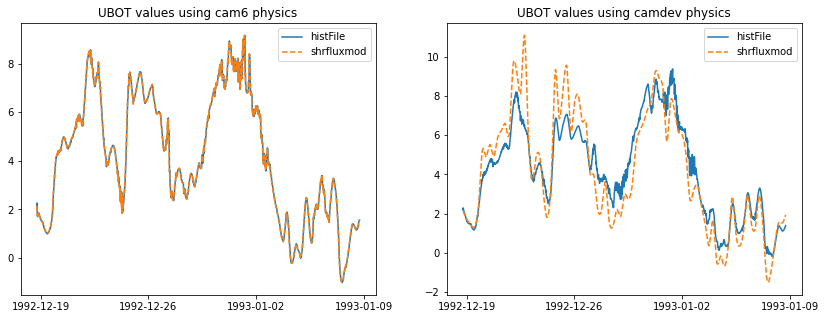

In [71]:
fig,axs = plt.subplots(1,2, figsize=(14,5))
axs.ravel()

axs[0].plot(atmh0_58cam_v3_toga.time.values[0:-1], np.squeeze(atmh0_58cam_v3_toga.U.isel(lev=-1).values[0:-1]),  label='histFile')
axs[0].plot(atmh0_58cam_v3_toga.time.values[0:-1],  timestepEnd_ubot58v3_toga,'--', label='shrfluxmod')
axs[0].legend()
axs[0].set_title('UBOT values using cam6 physics')

axs[1].plot(atmh0_58camdev3_toga.time.values[0:-1], np.squeeze(atmh0_58camdev3_toga.U.isel(lev=-1).values[0:-1]),  label='histFile')
axs[1].plot(atmh0_58camdev3_toga.time.values[0:-1],  timestepEnd_ubot58dev3_toga,'--', label='shrfluxmod')
axs[1].legend()
axs[1].set_title('UBOT values using camdev physics')


Text(0.5, 1.0, 'UBOT values using camdev physics (BOMEX)')

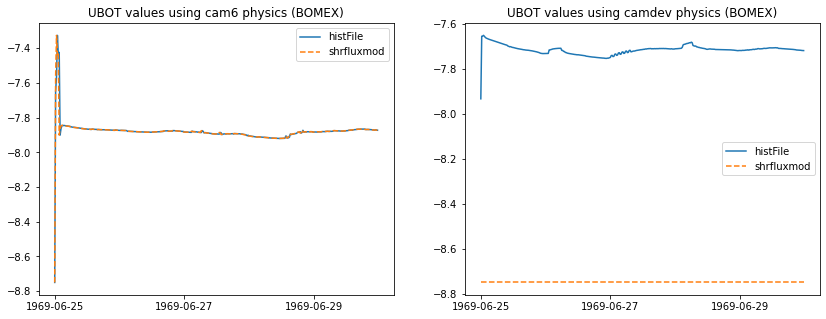

In [73]:
fig,axs = plt.subplots(1,2, figsize=(14,5))
axs.ravel()

axs[0].plot(atmh0_58_v3.time.values[0:-1], np.squeeze(atmh0_58_v3.U.isel(lev=-1).values[0:-1]),  label='histFile')
axs[0].plot(atmh0_58_v3.time.values[0:-1],  timestepEnd_ubot58v3,'--', label='shrfluxmod')
axs[0].legend()
axs[0].set_title('UBOT values using cam6 physics (BOMEX)')

axs[1].plot(atmh0_58camdev3.time.values[0:-1], np.squeeze(atmh0_58camdev3.U.isel(lev=-1).values[0:-1]),  label='histFile')
axs[1].plot(atmh0_58camdev3.time.values[0:-1],  timestepEnd_ubot58dev3,'--', label='shrfluxmod')
axs[1].legend()
axs[1].set_title('UBOT values using camdev physics (BOMEX)')


### Test Micre IOP?

In [4]:
dir_32L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestMICRE_U10dive.32L_cam6_print003/'
dir_58L       = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestMICRE_U10dive.58L_cam6_print003/'
dir_58Lcamdev = '/glade/scratch/mdfowler/archive/FSCAM.T42_T42.TestMICRE_U10dive.58L_camdev_print003/'

atmFile_32       = np.sort(glob.glob(dir_32L+'atm/hist/*h0*'))
atmFile_58       = np.sort(glob.glob(dir_58L+'atm/hist/*h0*'))
atmFile_58camdev = np.sort(glob.glob(dir_58Lcamdev+'atm/hist/*h0*'))

atmh0_32       = xr.open_dataset(atmFile_32[0], decode_times=True)
atmh0_58       = xr.open_dataset(atmFile_58[0], decode_times=True)
atmh0_58camdev = xr.open_dataset(atmFile_58camdev[0], decode_times=True)

## Get IOP stuff
iopFile ='/glade/p/cesmdata/cseg/inputdata/atm/cam/scam/iop/micre2017_3mo.macquarie2017.iop.nc'
iopDS   = xr.open_dataset(iopFile)

# iopDS_windMag = np.sqrt( (iopDS.usrf.values**2) + (iopDS.vsrf.values**2) )

# # IOP time is funky 
# iop_startTime = datetime.datetime(1992,12,18)
# iopTime = []
# for iTime in range(len(iopDS.tsec.values)):
#     iopTimeTemp = iop_startTime + datetime.timedelta(seconds=int(iopDS.tsec.values[iTime]))
#     iopTime     = np.append(iopTime, iopTimeTemp)

# iopDS['Time'] = (('time'), iopTime)

Text(0.5, 1.0, 'LHFLX')

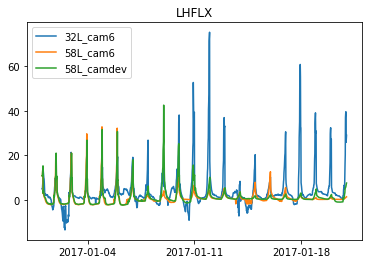

In [14]:
plt.plot(atmh0_32.time.values, np.squeeze(atmh0_32.LHFLX.values), label='32L_cam6')
plt.plot(atmh0_58.time.values, np.squeeze(atmh0_58.LHFLX.values), label='58L_cam6')
plt.plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev.LHFLX.values), label='58L_camdev')
plt.legend()

plt.title('LHFLX')



Text(0.5, 1.0, 'U10')

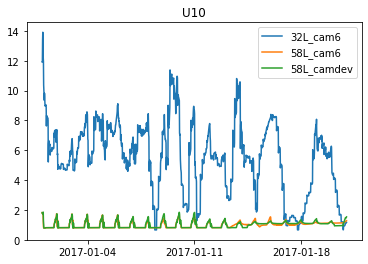

In [11]:
plt.plot(atmh0_32.time.values, np.squeeze(atmh0_32.U10.values), label='32L_cam6')
plt.plot(atmh0_58.time.values, np.squeeze(atmh0_58.U10.values), label='58L_cam6')
plt.plot(atmh0_58camdev.time.values, np.squeeze(atmh0_58camdev.U10.values), label='58L_camdev')
plt.legend()

plt.title('U10')


In [12]:
iopDS

<xarray.Dataset>
Dimensions:  (ilev: 33, lat: 1, lev: 32, lon: 1, time: 721)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T03:00:00 ... 2017-04-01
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lat      (lat) float64 -54.19
  * lon      (lon) float64 158.8
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
Data variables:
    u        (time, lev, lat, lon) float32 -22.19 -17.15 -14.5 ... 3.168 1.606
    omega    (time, lev, lat, lon) float32 -3.527e-05 -1.258e-05 ... -0.03805
    tsec     (time) datetime64[ns] 2017-01-01 2017-01-01T03:00:00 ... 2017-04-01
    bdate    int32 20170101
    nbdate   int32 20170101
    nbsec    int32 0
    v        (time, lev, lat, lon) float32 -2.149 -2.584 ... -19.43 -15.07
    t        (time, lev, lat, lon) float32 259.5 245.0 234.8 ... 280.1 281.2
    q        (time, lev, lat, lon) float32 2.738e-06 2.567e-06 ... 0.005608
    Ps       (time, lat, lon) float32 9.821e+04 9.853e+04 ... 1.001e+05
    Tsair    (time, lat, lon) float32 279.9 279.9 279.9 ... 279.6 279.5 279.5
    p0       int32 100000
    hyam     (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm     (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    hyai     (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    hybi     (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    Q_dten   (time, lev, lat, lon) float32 -2.056e-13 -8.133e-14 ... 9.819e-09
    divT3d   (time, lev, lat, lon) float32 0.0 0.0 0.0 ... 4.94e-05 4.339e-05
Attributes:
    history:                Mon Nov  4 06:45:21 2019: ncatted -a CAM_GENERATE...
    NCO:                    netCDF Operators version 4.7.9 (Homepage = http:/...
    CAM_GENERATED_FORCING:  yes